In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
print(sys.executable)


/Library/Developer/CommandLineTools/usr/bin/python3


In [3]:
df= pd.read_csv('../data/social_media_ad_optimization_raw.csv', delimiter=',') 
df.head()

,user_id,age,gender,location,interests,ad_id,ad_category,ad_platform,ad_type,impressions,clicks,conversion,time_spent_on_ad,day_of_week,device_type,engagement_score
0,U0001,58,M,USA,Food,A0001,Sportswear,Facebook,Image,3,0,0,3.38,Friday,Mobile,0.02
1,U0002,55,F,USA,Tech,A0002,Electronics,Facebook,Image,9,9,1,6.77,Saturday,Tablet,0.93
2,U0003,52,F,UK,Gaming,A0003,Luggage,Instagram,Image,13,12,1,13.26,Wednesday,Mobile,0.93
3,U0004,31,F,USA,Tech,A0004,Gadgets,Facebook,Video,14,5,0,24.41,Saturday,Desktop,0.28
4,U0005,52,M,India,Tech,A0005,Luggage,Instagram,Carousel,10,5,0,21.43,Monday,Tablet,0.35


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           500 non-null    object 
 1   age               500 non-null    int64  
 2   gender            500 non-null    object 
 3   location          500 non-null    object 
 4   interests         500 non-null    object 
 5   ad_id             500 non-null    object 
 6   ad_category       500 non-null    object 
 7   ad_platform       500 non-null    object 
 8   ad_type           500 non-null    object 
 9   impressions       500 non-null    int64  
 10  clicks            500 non-null    int64  
 11  conversion        500 non-null    int64  
 12  time_spent_on_ad  500 non-null    float64
 13  day_of_week       500 non-null    object 
 14  device_type       500 non-null    object 
 15  engagement_score  500 non-null    float64
dtypes: float64(2), int64(4), object(10)
memory u

,age,impressions,clicks,conversion,time_spent_on_ad,engagement_score
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,39.410000,8.282000,4.520000,0.470000,14.072300,0.520220
std,12.400219,4.217351,3.727383,0.499599,9.088768,0.306296
min,18.000000,1.000000,0.000000,0.000000,0.460000,0.000000
25%,28.000000,4.750000,1.000000,0.000000,4.990000,0.270000
50%,39.000000,9.000000,4.000000,0.000000,13.285000,0.550000
75%,51.000000,12.000000,7.000000,1.000000,21.732500,0.772500
max,60.000000,15.000000,15.000000,1.000000,29.950000,1.000000


In [5]:
df.isna().sum().sort_values(ascending=False)

user_id             0
age                 0
gender              0
location            0
interests           0
ad_id               0
ad_category         0
ad_platform         0
ad_type             0
impressions         0
clicks              0
conversion          0
time_spent_on_ad    0
day_of_week         0
device_type         0
engagement_score    0
dtype: int64

In [6]:
cat_cols = [
    'user_id', 'gender', 'location', 'interests',
    'ad_id', 'ad_category', 'ad_platform', 'ad_type',
    'day_of_week', 'device_type'
]

for col in cat_cols:
    df[col] = df[col].astype('category')
df.dtypes

user_id             category
age                    int64
gender              category
location            category
interests           category
ad_id               category
ad_category         category
ad_platform         category
ad_type             category
impressions            int64
clicks                 int64
conversion             int64
time_spent_on_ad     float64
day_of_week         category
device_type         category
engagement_score     float64
dtype: object

**Performance Metrics**

In [7]:
df["CTR"] = df["clicks"] / df["impressions"]
df["CVR"] = df["conversion"] / df["clicks"].replace(0, np.nan)
df["CVR"] = df["CVR"].fillna(0)
df.head()

,user_id,age,gender,location,interests,ad_id,ad_category,ad_platform,ad_type,impressions,clicks,conversion,time_spent_on_ad,day_of_week,device_type,engagement_score,CTR,CVR
0,U0001,58,M,USA,Food,A0001,Sportswear,Facebook,Image,3,0,0,3.38,Friday,Mobile,0.02,0.000000,0.000000
1,U0002,55,F,USA,Tech,A0002,Electronics,Facebook,Image,9,9,1,6.77,Saturday,Tablet,0.93,1.000000,0.111111
2,U0003,52,F,UK,Gaming,A0003,Luggage,Instagram,Image,13,12,1,13.26,Wednesday,Mobile,0.93,0.923077,0.083333
3,U0004,31,F,USA,Tech,A0004,Gadgets,Facebook,Video,14,5,0,24.41,Saturday,Desktop,0.28,0.357143,0.000000
4,U0005,52,M,India,Tech,A0005,Luggage,Instagram,Carousel,10,5,0,21.43,Monday,Tablet,0.35,0.500000,0.000000


In [8]:
df.describe(include='all')

,user_id,age,gender,location,interests,ad_id,ad_category,ad_platform,ad_type,impressions,clicks,conversion,time_spent_on_ad,day_of_week,device_type,engagement_score,CTR,CVR
count,500,500.000000,500,500,500,500,500,500,500,500.000000,500.000000,500.000000,500.000000,500,500,500.000000,500.000000,500.000000
unique,500,NaN,3,6,6,50,6,2,3,NaN,NaN,NaN,NaN,7,3,NaN,NaN,NaN
top,U0001,NaN,M,Australia,Tech,A0001,Gadgets,Instagram,Image,NaN,NaN,NaN,NaN,Wednesday,Desktop,NaN,NaN,NaN
freq,1,NaN,178,101,93,10,91,254,178,NaN,NaN,NaN,NaN,86,171,NaN,NaN,NaN
mean,NaN,39.410000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.282000,4.520000,0.470000,14.072300,NaN,NaN,0.520220,0.539864,0.166738
std,NaN,12.400219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.217351,3.727383,0.499599,9.088768,NaN,NaN,0.306296,0.340362,0.273606
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.460000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.750000,1.000000,0.000000,4.990000,NaN,NaN,0.270000,0.262500,0.000000
50%,NaN,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,4.000000,0.000000,13.285000,NaN,NaN,0.550000,0.533333,0.000000
75%,NaN,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,7.000000,1.000000,21.732500,NaN,NaN,0.772500,0.857143,0.200000


**Distribution of Key Numerical Variables**

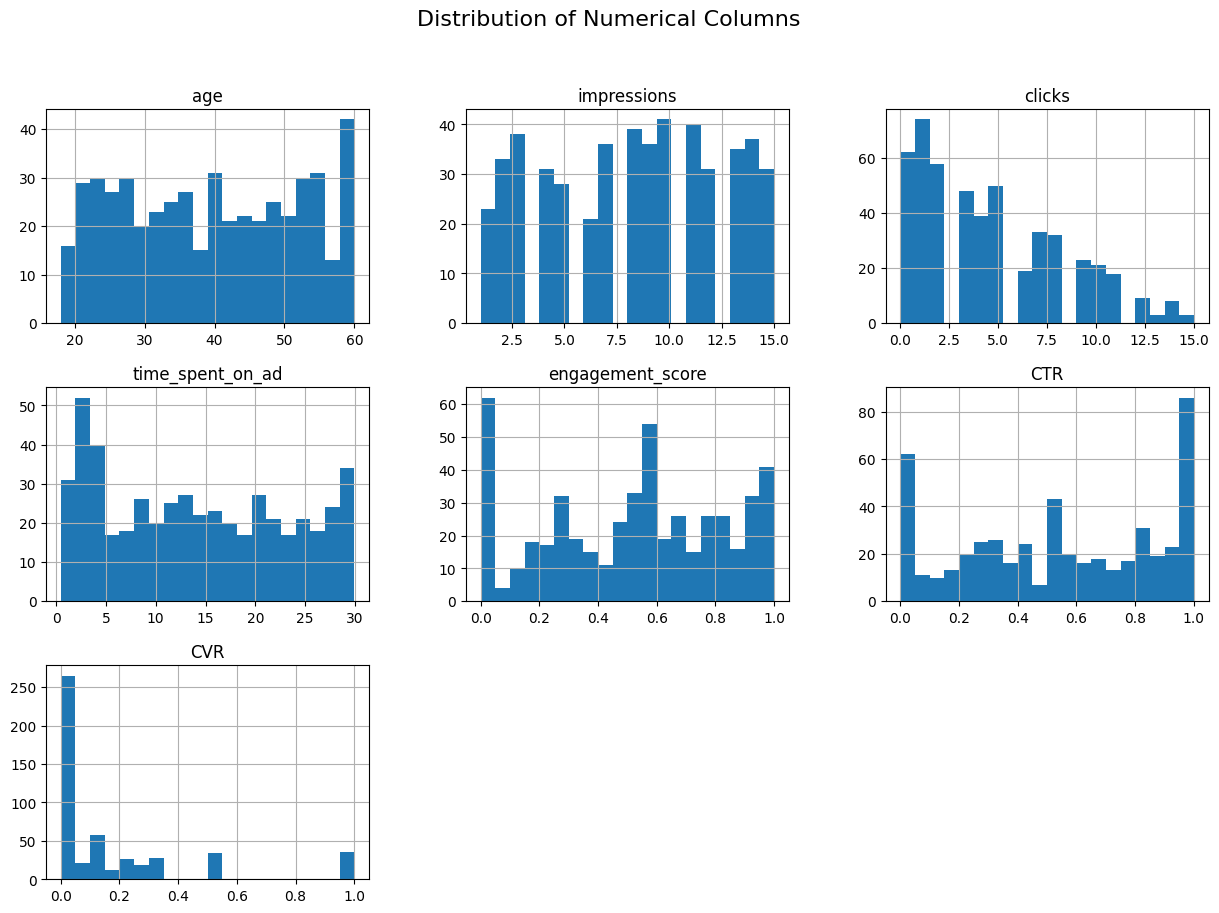

In [9]:
num_cols= [
    'age', 'impressions', 'clicks', 'time_spent_on_ad', 'engagement_score', 'CTR', 'CVR'
]
df[num_cols].hist(bins=20, figsize=(15,10))
plt.suptitle("Distribution of Numerical Columns", fontsize=16)
plt.show()

**Platform Comparison (Facebook vs Instagram)**

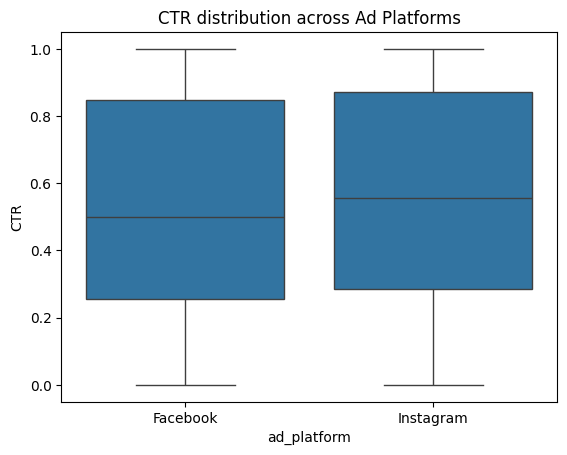

In [10]:
sns.boxplot(data=df, x='ad_platform', y='CTR')
plt.title("CTR distribution across Ad Platforms")
plt.show()

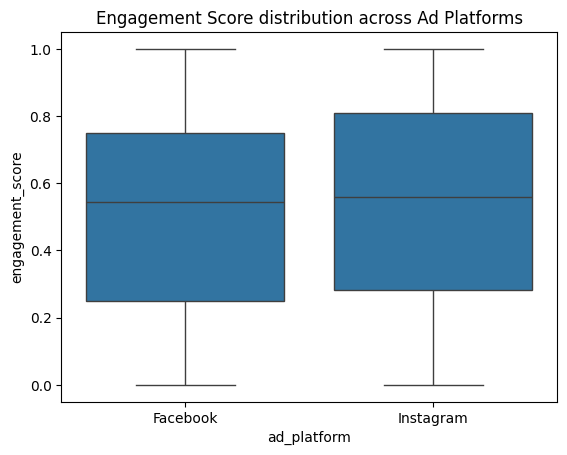

In [11]:
sns.boxplot(data=df, x='ad_platform', y='engagement_score')
plt.title("Engagement Score distribution across Ad Platforms")
plt.show()

**Contextual Factors (Day, Device) vs Engagement**

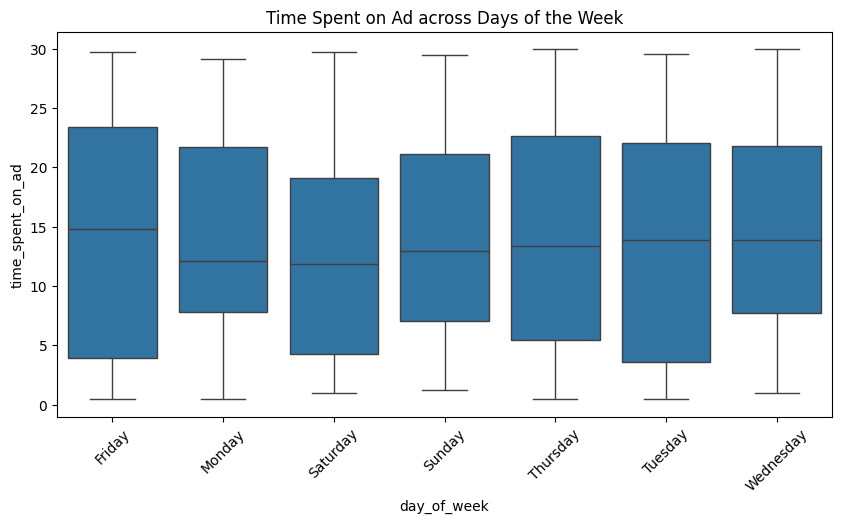

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='day_of_week', y='time_spent_on_ad')
plt.title("Time Spent on Ad across Days of the Week")
plt.xticks(rotation=45)
plt.show()

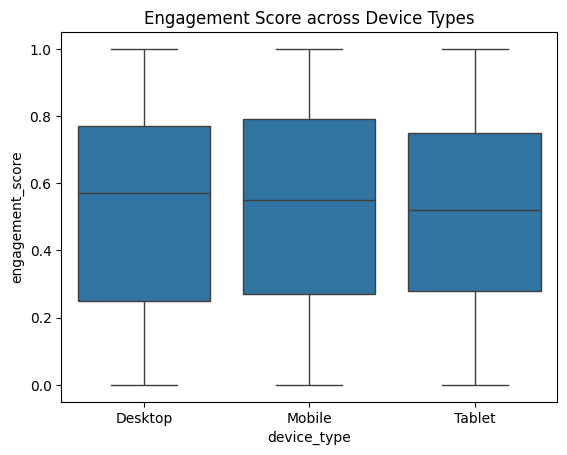

In [13]:
sns.boxplot(data=df, x='device_type', y='engagement_score')
plt.title("Engagement Score across Device Types")
plt.show()

**Demographics Impact**

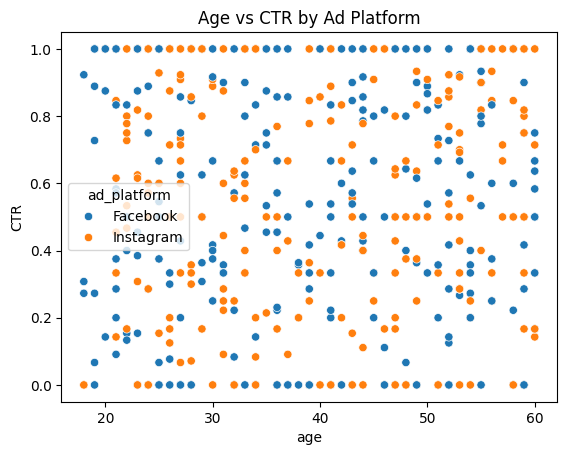

In [14]:
sns.scatterplot(data=df, x='age', y='CTR', hue='ad_platform')
plt.title("Age vs CTR by Ad Platform")
plt.show()

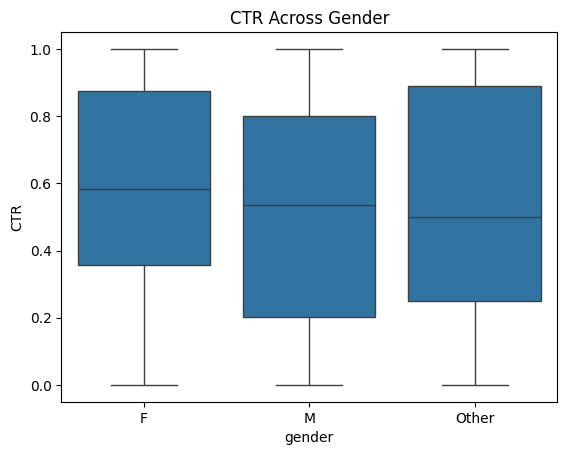

In [15]:
sns.boxplot(data=df, x="gender", y="CTR")
plt.title("CTR Across Gender")
plt.show()

**Correlation Heatmap**

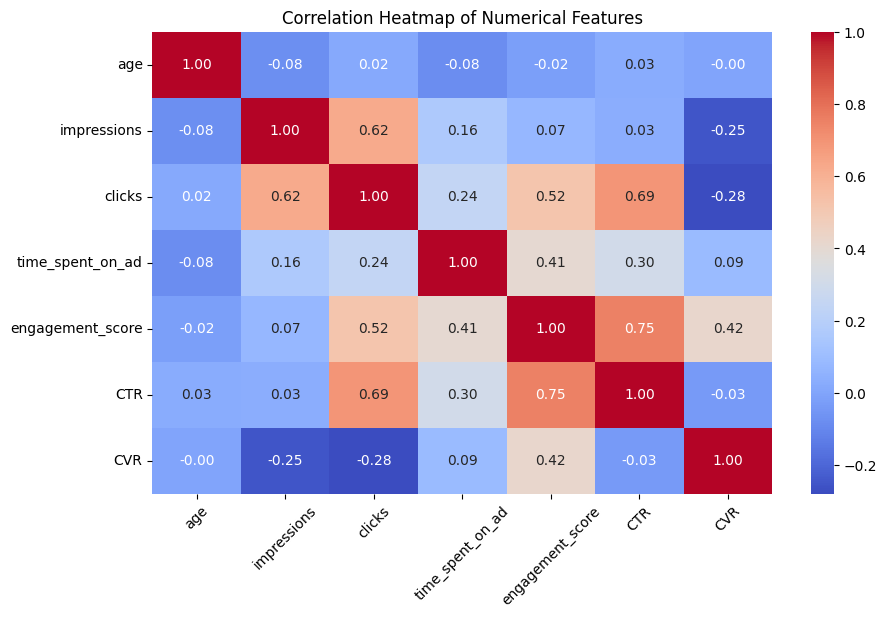

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.xticks(rotation=45)
plt.show()

**High Impressions but Low Conversions**

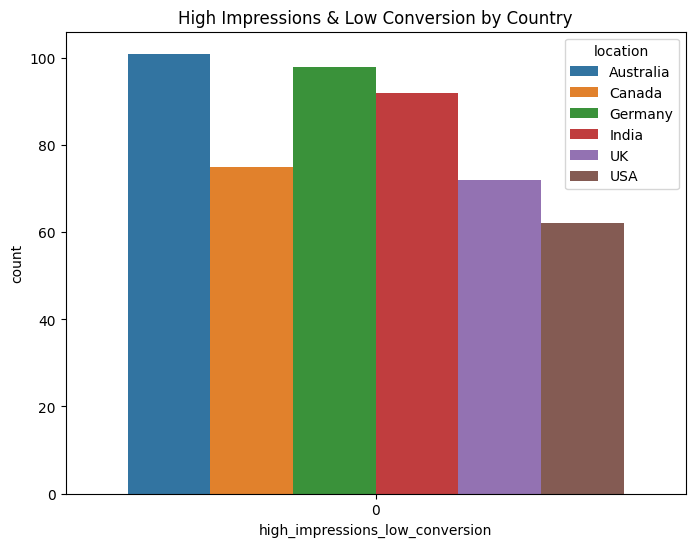

In [23]:
df["high_impressions_low_conversion"] = np.where((df["impressions"] > df["impressions"].median()) & (df["conversion"] < df["conversion"].median()), 1, 0)
df[["impressions", "conversion", "high_impressions_low_conversion"]].head()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='high_impressions_low_conversion', hue='location')
plt.title("High Impressions & Low Conversion by Country")
plt.show()